In [3]:
!pip install google-api-python-client

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import googleapiclient.discovery
import pandas as pd

In [5]:
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

youtube = googleapiclient.discovery.build(
           api_service_name,api_version,developerKey = DEVELOPER_KEY)


In [6]:
#Make a request to youtube API
request = youtube.commentThreads().list(
    part='snippet',
#     videoId = "WNrB1Q9Rry0",
#     videoId = "XxdM9vNNY3w",
    videoId = "gTK5rNhWJyA",
    maxResults=100
    )

#Get a response from API
response = request.execute()

In [7]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'sIlj7TmamV2QDmGlnUs2rFcVdbY',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpb0lCZ0FFZ1VJaUNBWUFCSUZDSjBnR0FFU0JRaUhJQmdBR0FBaURRb0xDUExtdzZzR0VLaVN5bmc=',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'UT1tRC3W3fLQo5pKRClGwmoS97E',
   'id': 'UgwWowaJzFNPFeY2b4V4AaABAg',
   'snippet': {'channelId': 'UC3rY5HOgbBvGmq7RnDfwF7A',
    'videoId': 'gTK5rNhWJyA',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'Lt-ZUN6989oPwHrrEz5JBqJ4r6g',
     'id': 'UgwWowaJzFNPFeY2b4V4AaABAg',
     'snippet': {'channelId': 'UC3rY5HOgbBvGmq7RnDfwF7A',
      'videoId': 'gTK5rNhWJyA',
      'textDisplay': 'Hi folks, in case anyone facing issue to download the excel Vrinda Store dataset can use this google drive link: <a href="https://bit.ly/3Ypatqu">https://bit.ly/3Ypatqu</a>',
      'textOriginal': 'Hi folks, in case anyone facing issue t

In [8]:
response['items'][10]['snippet']

{'channelId': 'UC3rY5HOgbBvGmq7RnDfwF7A',
 'videoId': 'gTK5rNhWJyA',
 'topLevelComment': {'kind': 'youtube#comment',
  'etag': 'XqjyQlReYnzjkA7BqBNQvENJxdw',
  'id': 'UgylVZqJILSc0t-j8nh4AaABAg',
  'snippet': {'channelId': 'UC3rY5HOgbBvGmq7RnDfwF7A',
   'videoId': 'gTK5rNhWJyA',
   'textDisplay': 'Literally so well explained 👌<br>Major skills used in this single video : Data cleaning, Data processing, Pivot charts, Dashboard, Insights and Conclusion<br>Great work as always ✨',
   'textOriginal': 'Literally so well explained 👌\nMajor skills used in this single video : Data cleaning, Data processing, Pivot charts, Dashboard, Insights and Conclusion\nGreat work as always ✨',
   'authorDisplayName': '@gokusan6426',
   'authorProfileImageUrl': 'https://yt3.ggpht.com/5z5z1EMaBLvrsgljcnzXIi9gLTNQIcWjAzKRPPWMOtvKz8sQ5Q8R94r3B87VuGgxOj-i39HsJA=s48-c-k-c0x00ffffff-no-rj',
   'authorChannelUrl': 'http://www.youtube.com/@gokusan6426',
   'authorChannelId': {'value': 'UC0Y1qBCihQj8e8HcMrjGSCQ'},
  

In [9]:
video_snippet = response['items'][0]['snippet']
uploader_channel_id = video_snippet['channelId']

In [10]:
authorname = []
comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    if comment['authorChannelId']['value'] != uploader_channel_id:
        comments.append(comment['textOriginal'])

In [11]:
df = pd.DataFrame(comments,columns=['original comments'])
df.shape

(99, 1)

In [12]:
df.head(20)

,original comments
0,sir what if null value present in column
1,I dont understanding the language but i unders...
2,Literally bro mjasa aagya thanks for this lear...
3,Is it possible to add maps & scroller in Excel...
4,"sir apka dya hua file download kiya, but qty m..."
5,Can I add this for Data analyst resume in Github
6,excellent knowledge
7,What to do if there are null values in columns ?
8,sir apne legend mein percentage 0% se 10% then...
9,Literally so well explained 👌\nMajor skills us...


In [13]:
!pip install emoji
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
import re
import emoji
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
# for i in range(len(df)):
#     comment = df.loc[i, 'original comments']
    
#     ##convert comments to lower case
#     df.loc[i, 'original comments'] = " ".join(x.lower() for x in comment.split())

#     #remove emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F700-\U0001F77F"  # alchemical symbols
#                                u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
#                                u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
#                                u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#                                u"\U0001FA00-\U0001FA6F"  # Chess Symbols
#                                u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
#                                u"\U00002702-\U000027B0"  # Dingbats
#                                u"\U000024C2-\U0001F251" 
#                                "]+", flags=re.UNICODE)
#     df.loc[i, 'original comments'] = emoji_pattern.sub(' ', df.loc[i, 'original comments'])
    
#     df.loc[i, 'original comments'] = re.sub("[0-9]+","",comment)
#     #remove punctuation marks 
#     df.loc[i, 'original comments'] = "".join([char for char in df.loc[i, 'original comments'] if char not in string.punctuation])
    
#     df.loc[i, 'original comments'] = re.sub('\w*\d\w*'," ",df.loc[i, 'original comments'])
    
#     df.loc[i, 'original comments'] = re.sub('_'," ",df.loc[i, 'original comments'])
    
#     #remove mutiple whitespaces to single space
#     df.loc[i, 'original comments'] = re.sub(r'\s+'," ",df.loc[i, 'original comments'])
    
#     df.loc[i, 'original comments'] = re.sub('\n'," ",df.loc[i, 'original comments'])
    
#     df.loc[i, 'original comments'] = " ".join([word for word in df.loc[i, 'original comments'].split() if word.lower() not in set(stopwords.words('english'))])
    
#     #remove non-english words
    
 
# # df = df[df['original comments'].str.len() > 0]
# df.head(20)

,original comments
0,sir what if null value present in column
1,I dont understanding the language but i unders...
2,Literally bro mjasa aagya thanks for this lear...
3,Is it possible to add maps scroller in Excel l...
4,sir apka dya hua file download kiya but qty ma...
5,Can I add this for Data analyst resume in Github
6,excellent knowledge
7,What to do if there are null values in columns
8,sir apne legend mein percentage se then kaise ...
9,Literally so well explained 👌 Major skills use...


In [15]:
import re
import string
 

for i in range(len(df)):
    comment = df.loc[i, 'original comments']
    
    # Convert comments to lowercase
    df.loc[i, 'original comments'] = " ".join(x.lower() for x in comment.split())

#     Remove emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F700-\U0001F77F"  # alchemical symbols
#                                u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
#                                u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
#                                u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#                                u"\U0001FA00-\U0001FA6F"  # Chess Symbols
#                                u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
#                                u"\U00002702-\U000027B0"  # Dingbats
#                                u"\U000024C2-\U0001F251" 
#                                "]+", flags=re.UNICODE)
#     df.loc[i, 'original comments'] = emoji_pattern.sub('', df.loc[i, 'original comments'])
    
#     # Remove punctuation marks
#     df.loc[i, 'original comments'] = "".join([char for char in df.loc[i, 'original comments'] if char not in string.punctuation])
    
#     # Remove non-alphabetic characters and digits
#     df.loc[i, 'original comments'] = re.sub('[^a-zA-Z]', ' ', df.loc[i, 'original comments'])
    
#     # Remove multiple whitespaces to single space
#     df.loc[i, 'original comments'] = re.sub(r'\s+', ' ', df.loc[i, 'original comments']).strip()
    
#     # Remove stopwords
#     df.loc[i, 'original comments'] = " ".join([word for word in df.loc[i, 'original comments'].split() if word.lower() not in set(stopwords.words('english'))])
    
    

# Remove rows with empty comments
df = df[df['original comments'].str.len() > 0]
df.reset_index(drop=True, inplace=True)
df.head(20)

,original comments
0,sir what if null value present in column
1,i dont understanding the language but i unders...
2,literally bro mjasa aagya thanks for this lear...
3,is it possible to add maps & scroller in excel...
4,"sir apka dya hua file download kiya, but qty m..."
5,can i add this for data analyst resume in github
6,excellent knowledge
7,what to do if there are null values in columns ?
8,sir apne legend mein percentage 0% se 10% then...
9,literally so well explained 👌 major skills use...


In [62]:
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd

# Assuming you have 'df' DataFrame defined

lemmatizer = WordNetLemmatizer()

for i in range(len(df)):
    words = nltk.word_tokenize(df.loc[i, "original comments"])
#     words = [lemmatizer.lemmatize(word) for word in words]
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]  # 'v' indicates verb POS
    df.loc[i, "original comments"] = ' '.join(words)

df.head(20)
      

,original comments
0,prank pandey jiii🤣🤣🤣
1,kitna hi accha ho agr iska prank sach ho jaye🤣🤣🤣
2,abe tu bhi usko roast karke aur publicity de r...
3,poonam didi respawn ho gyi 😂
4,thugesh dalle😂😂 . your face be funniest than y...
5,ye hai kon .... phele to ye batao
6,10:09 the last ride be the last song of sishum...
7,atleast she have make awareness among the ladi...
8,google ne death confirm krdi thi😅
9,arre yaar abhi search karke aaya toh pata chal...


In [63]:
df.iloc[17]

original comments    bkl
Name: 17, dtype: object

In [16]:
df.head(20)

,original comments
0,sir what if null value present in column
1,i dont understanding the language but i unders...
2,literally bro mjasa aagya thanks for this lear...
3,is it possible to add maps & scroller in excel...
4,"sir apka dya hua file download kiya, but qty m..."
5,can i add this for data analyst resume in github
6,excellent knowledge
7,what to do if there are null values in columns ?
8,sir apne legend mein percentage 0% se 10% then...
9,literally so well explained 👌 major skills use...


## Modeling

### 1. Vader Model In this, NLTK's SetimentIntensityAnalyzer is used to get the positive/neutral/negative score of the comment

In [17]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

positive_comments = []
negative_comments = []
neutral_comments = []
polarity = []  # Initialize polarity list

# Function to get overall sentiment using mean
def get_overall_sentiment(df):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Function to get sentiment score
    def get_sentiment_score(text):
        sentiment_dict = sia.polarity_scores(text)
        polarity.append(sentiment_dict['compound'])
        return sentiment_dict['compound']

    # Apply the function to each comment in the DataFrame
    df['sentiment_score'] = df['original comments'].apply(get_sentiment_score)

    # Calculate mean sentiment score
    mean_sentiment_score = sum(polarity) / len(polarity)
    print("Mean Sentiment Score:", mean_sentiment_score)

    # Append comments to respective lists based on thresholds
    for index, row in df.iterrows():
        comment = row["original comments"]
        score = row["sentiment_score"]  # Use the sentiment_score column

        if score > 0.05:
            positive_comments.append(comment)
        elif score < -0.05:
            negative_comments.append(comment)
        else:
            neutral_comments.append(comment)

    # Determine overall sentiment label
    if mean_sentiment_score >= 0.05:
        overall_sentiment = 'positive'
    elif mean_sentiment_score <= -0.05:
        overall_sentiment = 'negative'
    else:
        overall_sentiment = 'neutral'

    return overall_sentiment

# Get overall sentiment
overall_sentiment = get_overall_sentiment(df)

# Display the results
print("Overall Sentiment: {}".format(overall_sentiment))
print("Positive Comments:", positive_comments)
print("Negative Comments:", negative_comments)
print("Neutral Comments:", neutral_comments)


Mean Sentiment Score: 0.3995414141414141
Overall Sentiment: positive
Positive Comments: ['sir what if null value present in column', 'i dont understanding the language but i understand all the concepts. thanks', 'literally bro mjasa aagya thanks for this learning ❤❤❤ love from delhi', 'is it possible to add maps & scroller in excel like that in powerbi?', 'sir apka dya hua file download kiya, but qty mai filter jab lgaya toh only one is showing, jab two replace kar rhi hu toh showing it is a protected sheet, kya karu please reply', 'excellent knowledge', 'what to do if there are null values in columns ?', 'sir apne legend mein percentage 0% se 10% then 20%kaise kiya mere excel mein 0% se 5% then 15% 20% aaraha hai.. can u guide how to reduce the percentage in legend bar', 'literally so well explained 👌 major skills used in this single video : data cleaning, data processing, pivot charts, dashboard, insights and conclusion great work as always ✨', 'well describe sir 😃😃😃', 'awesomely exp

[nltk_data] Downloading package vader_lexicon to C:\Users\Diksha
[nltk_data]     Vodnala\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

positive_comments = []
negative_comments = []
neutral_comments = []


# Function to get overall sentiment using mean
def get_overall_sentiment(df):
    # Initialize the SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Function to get sentiment score
    def get_sentiment_score(text):
        return sia.polarity_scores(text)['compound']

    # Apply the function to each comment in the DataFrame
    df['sentiment_score'] = df['original comments'].apply(get_sentiment_score)
    
    # Calculate mean sentiment score
    mean_sentiment_score = df['sentiment_score'].mean()
    print(mean_sentiment_score)

    # Append comments to respective lists
    for index, row in df.iterrows():
        comment = row['original comments']
        score = get_sentiment_score(comment)

        if score > 0.05:
            positive_comments.append(comment)
        elif score < -0.05:
            negative_comments.append(comment)
        else:
            neutral_comments.append(comment)

    # Determine overall sentiment label
    if mean_sentiment_score >= 0.05:
        overall_sentiment = 'positive'
    elif mean_sentiment_score <= -0.05:
        overall_sentiment = 'negative'
    else:
        overall_sentiment = 'neutral'

    return overall_sentiment

# Get overall sentiment
overall_sentiment = get_overall_sentiment(df)

# Display the results
print("Overall Sentiment: {}".format(overall_sentiment))
print("Positive Comments:", positive_comments)
print("Negative Comments:", negative_comments)
print("Neutral Comments:", neutral_comments)


0.0004866666666666698
Overall Sentiment: neutral
Positive Comments: ['thugesh dalle face funniest video lots support', 'atleast made awareness among ladies ladies always busy grooming family n kids way convey message sometime take things positive way also', 'unsubscribe fan subscription kamene dokha de gye', 'kar diya like', 'thugesh love memes never ending', 'thank god alive', 'ranvieer like yeeee content content', 'thugesh bhai weight gain ka liya suplement lena ok hai', 'yeh poonam pandey hai kon yaar mein kal se confused hoon please help', 'koi serious fan agar society kar leta aab kiske bade bade dekhuga', 'energy', 'may thagesh bhai supporting muslim lil bit love bhai free palestine', 'yati yathi lol', 'love u thaggu', 'seen aisaa hota ha jab kuch gyada hhhee shorts dekhte ho like person begin kiya app jante ho apko koi bhe jail mea nhi dal sakta kiunki app iye case kr sakte ho', 'bhai khud ke hi memes per meme reaction video banao idea aaccha lga video mera nam le lena thanks']


[nltk_data] Downloading package vader_lexicon to C:\Users\Diksha
[nltk_data]     Vodnala\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### WordCloud

In [19]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


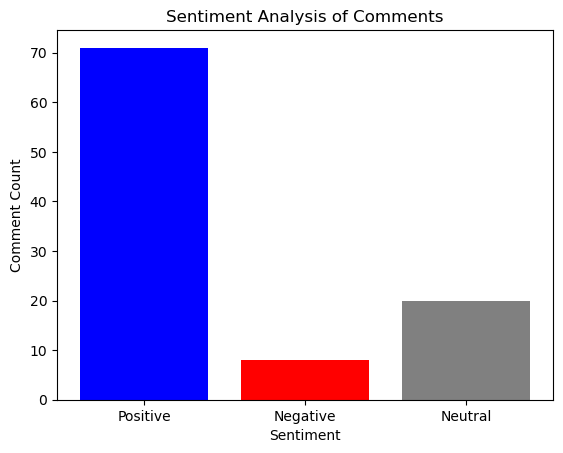

In [20]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)
 
# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]
 
# Creating bar chart
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])
 
# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')
 
# Displaying the chart
plt.show()

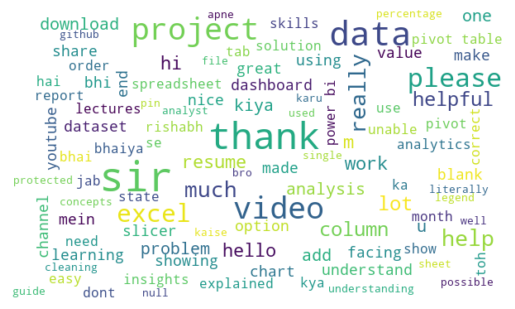

In [21]:
def word_cloud(df):
    allWords = ' '.join([i for i in df["original comments"]])
    wordCloud = WordCloud(width=600,max_font_size=50,height=350, max_words=100, background_color="white").generate(allWords)
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

word_cloud(df)
    